# Telco churn predicition - Clustering customers
In order to predict customer behaviour as well as possible, let's see if there are any clusters of customers that are not possible to see 'off the bat'.

---

In [29]:
# Imports

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Paths

# Note : In order to run this code on your machine, make sure the path variable is correct.

path = 'C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 10\\Project_Telco_churn'
os.chdir(path)
figures = path + '\\Figures\\KMeans\\'
data = path + '\\Data\\'

In [30]:
# Figure settings

fig_size = (24,16)
title_size = 30
label_size = 25
tick_size = 20
sns.set_style("darkgrid")
sns.set_palette("Paired")

### Lets get our data



---

In [31]:
df = pd.read_csv(data + 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

df["TotalCharges"] = df.TotalCharges.apply(lambda x: float(x) if x!=' ' else 0)
df["Churn"] = df.Churn.apply(lambda x: 1 if x == "Yes" else 0)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [32]:
# Define data

X = df.drop(columns = ["customerID", "Churn"])

### Preprocessing & cluster count evaluation
We will need to preprocess our data. We have no null values which helps. In order to handle outliers in the `TotalCharges`-category, we will use `RobustScaler()` to scale our values. `OneHotEncoder()` will be used to encode non-numeric data into binary data.

We will also need to evaluate what number of clusters best explains the variance in the data.

---

In [33]:
# Imports from sklearn

from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from yellowbrick.cluster import KElbowVisualizer

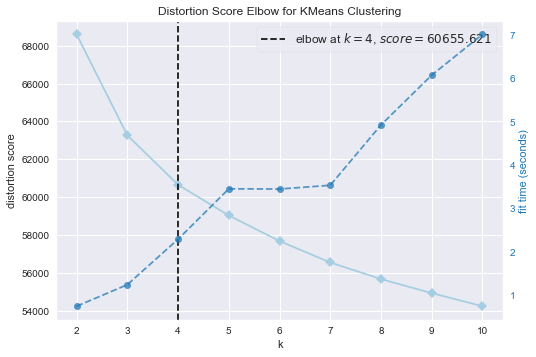

<Figure size 576x396 with 0 Axes>

In [34]:
import warnings
warnings.filterwarnings('ignore')

scaler = RobustScaler(with_centering = False)
encoder = OneHotEncoder()
cluster = KMeans(random_state = 42)

pipe = make_pipeline(encoder, scaler, KElbowVisualizer(cluster))
elbow = pipe.fit(X)
elbow[2].show()
plt.savefig(figures + "Elbow_score_non_reduced")
plt.show()

It looks like 4 clusters is the optimal amount. Lets fit our data accordingly.

In [35]:
cluster = KMeans(n_clusters = 4, random_state = 42)
pipe = make_pipeline(encoder, scaler, cluster)
pipe.fit(X)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('robustscaler', RobustScaler(with_centering=False)),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [36]:
df["group"] = pipe["kmeans"].labels_
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


### Lets see if the groups bring any clarity to the data we looked at in the EDA

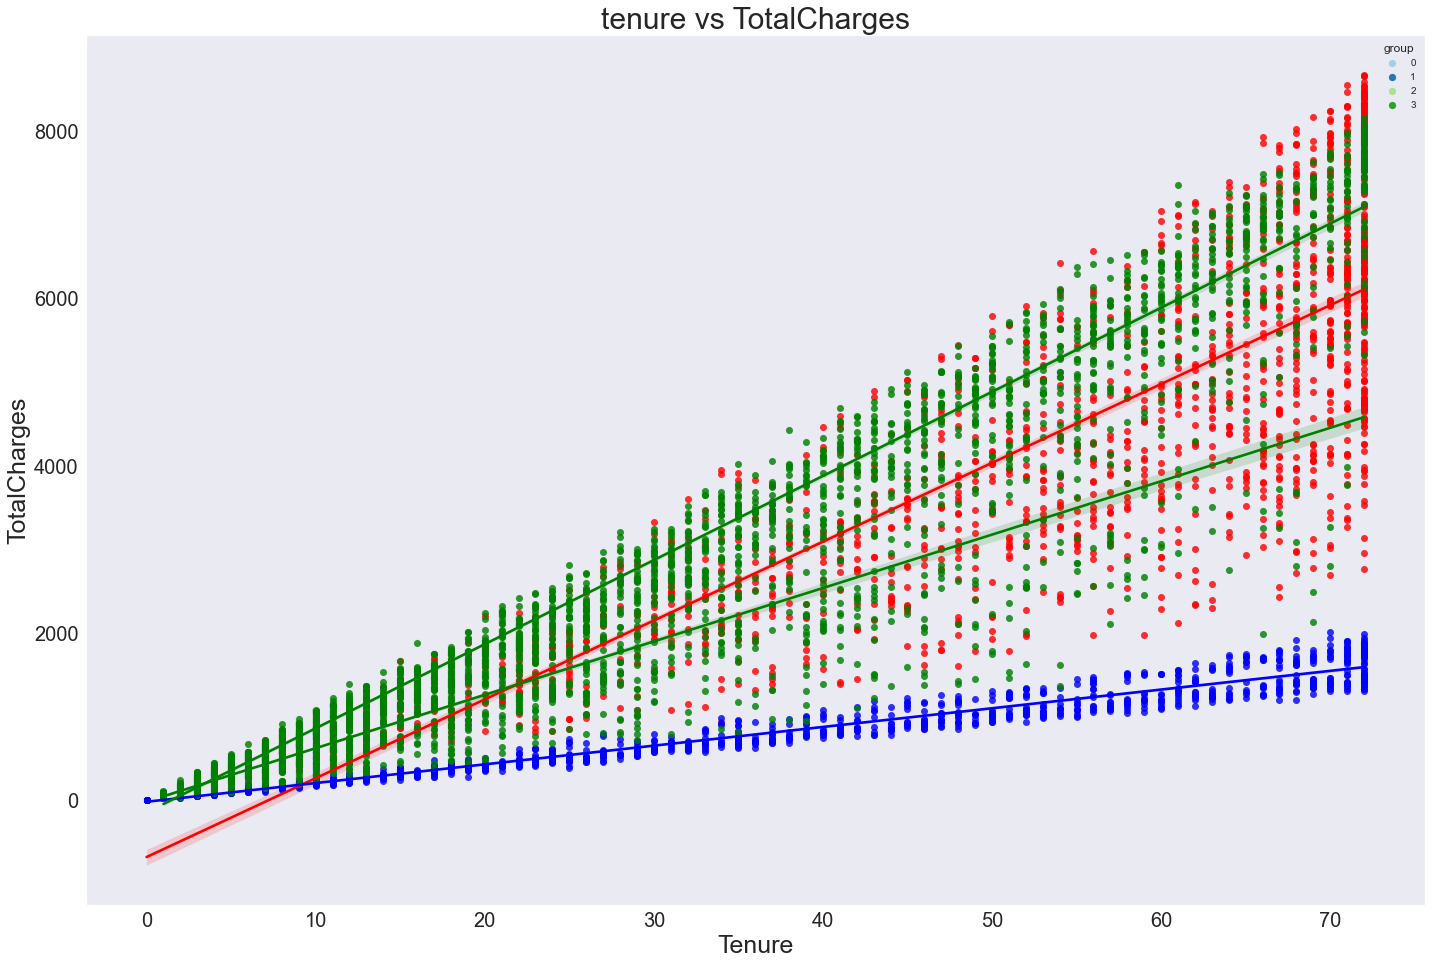

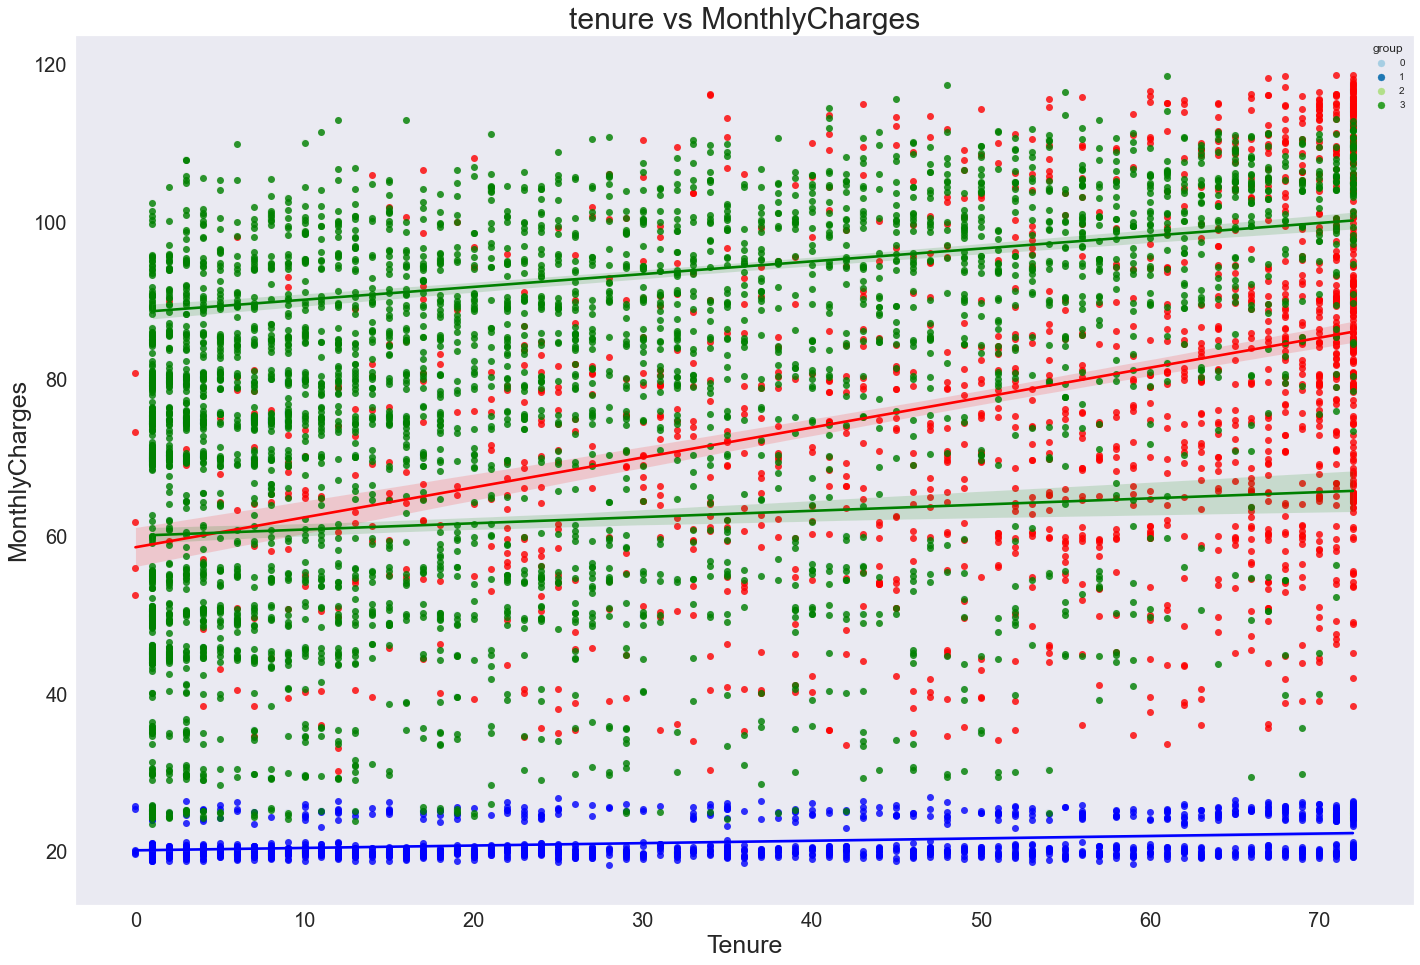

In [37]:
y = ['TotalCharges', 'MonthlyCharges']
x = 'tenure'
sns.set_style("dark")
for feat in y:
    plt.figure(figsize = fig_size)
    sns.scatterplot(data = df, x = x, y = feat, hue = 'group', palette = "Paired", alpha = 0.1)
    sns.regplot(data = df, x = df.loc[df.group==0]['tenure'], y = df.loc[df.group==0][feat], color = "red")
    sns.regplot(data = df, x = df.loc[df.group==2]['tenure'], y = df.loc[df.group==2][feat], color = "blue")
    sns.regplot(data = df, x = df.loc[df.group==1]['tenure'], y = df.loc[df.group==1][feat], color = "green")
    sns.regplot(data = df, x = df.loc[df.group==3]['tenure'], y = df.loc[df.group==3][feat], color = "green")
    plt.title(f"{x} vs {feat}", size = title_size)
    plt.xlabel('Tenure', size = label_size)
    plt.ylabel(feat, size = label_size)
    plt.xticks(size = tick_size)
    plt.yticks(size = tick_size)
    plt.savefig(figures+f'scatter_{feat}_with_clusters')
    plt.show()
    
sns.set_style("darkgrid")

### There does seem to be some distinctive clustering. Lets see how this relates to churn

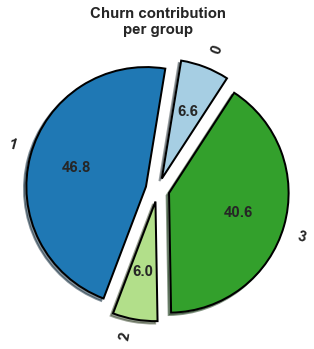

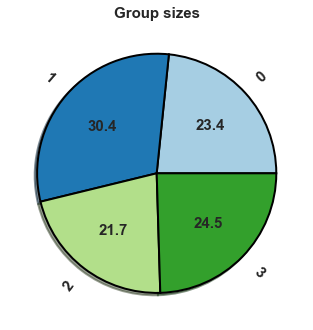

In [38]:
x1 = df.loc[df.Churn==1].groupby(by = "group")["Churn"].sum()
x2 = df.groupby(by = "group")["customerID"].count()

labels1 = x1.index
labels2 = x2.index

# labels1 = list(zip(labels1,x1))
# labels2 = list(zip(labels2,x2))

plt.pie(x = x1,
        labels = labels1,
        explode = [0.1, 0.1, 0.1, 0.1],
        shadow = True,
        textprops = {"size" : 15,
                     "weight" : "bold"},
        wedgeprops = {"linewidth" : 2,
                      "edgecolor" : "black",
                      "hatch" : "",
                      "rasterized" : True},
        rotatelabels = True,
        startangle = 57,
        autopct = "%.1f")

plt.title("Churn contribution\nper group", size = 15, weight = "bold")
plt.savefig(figures + '4_groups_churn_pie')
plt.show()

plt.pie(x = x2,
        labels = labels2,
        explode = [0.0, 0.0, 0.0, 0.0],
        shadow = True,
        textprops = {"size" : 15,
                     "weight" : "bold"},
        wedgeprops = {"linewidth" : 2,
                      "edgecolor" : "black",
                      "hatch" : "",
                      "rasterized" : True},
        rotatelabels = True,
        startangle = 0,
        autopct = "%.1f")

plt.title("Group sizes", size = 15, weight = "bold")
plt.savefig(figures + '4_groups_size_pie')
plt.show()

### Illustrate with barplots

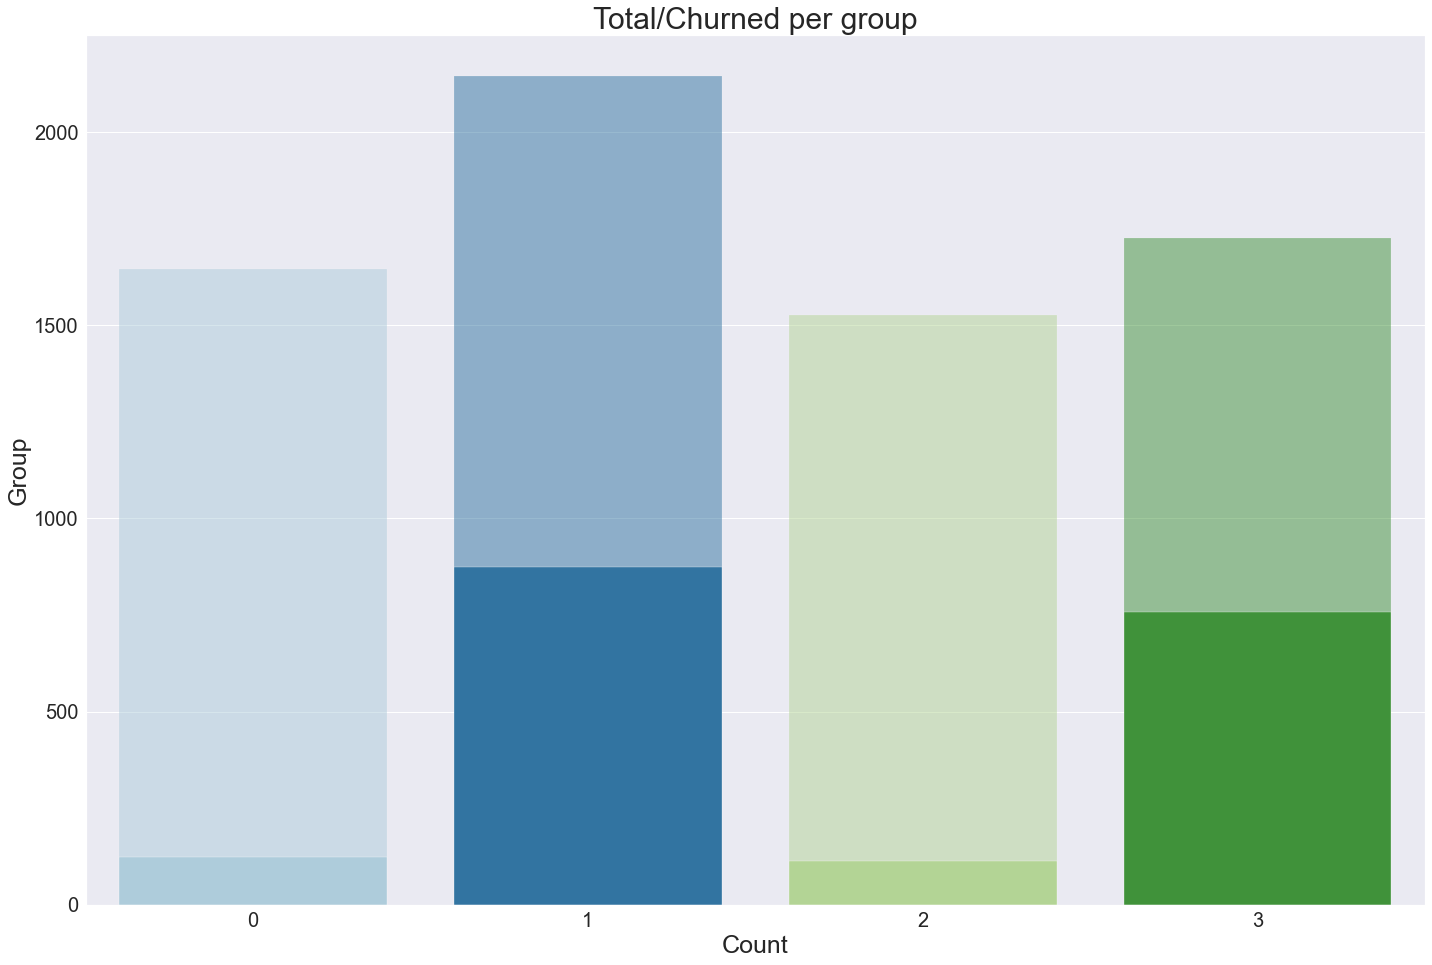

In [39]:
plt.figure(figsize = fig_size)
sns.barplot(x = df.group.value_counts().index, y = df.group.value_counts(), alpha = 0.5)
sns.barplot(x = df.loc[df.Churn==1].group.value_counts().index, y = df.loc[df.Churn==1].group.value_counts())
plt.title("Total/Churned per group", size = title_size)
plt.xlabel("Count", size = label_size)
plt.ylabel("Group", size = label_size)
plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.savefig(figures + '4_groups_bars')
plt.show()

### Findings
* The vast majority of churned customers come from groups 0 and 2
* These in turn account for ~ 50% of all customers

### Lets look at how many customers churn/retain in each group

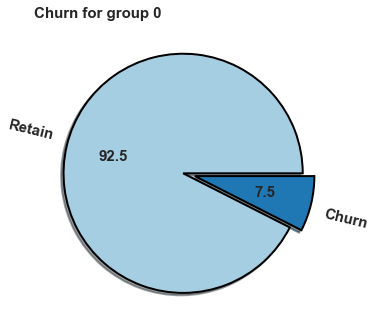

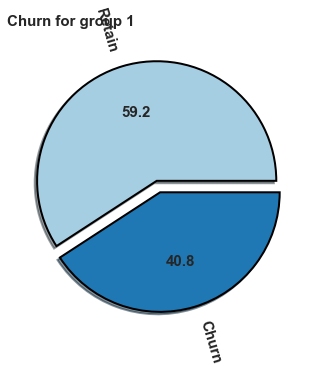

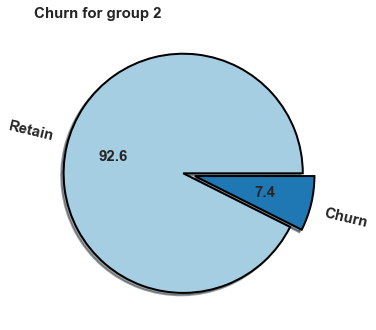

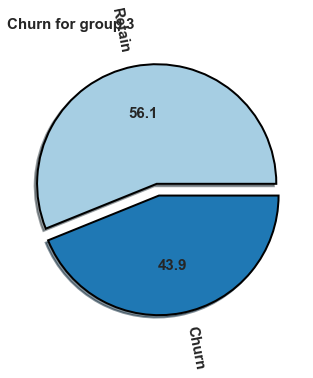

In [40]:
for i in range(0,4):
    
    churn0 = df.loc[df.group==i].Churn.value_counts()
#     churn2 = df.loc[df.group==2].Churn.value_counts()
    churn0.sort_index(inplace=True)
    labels = churn0.index
    labels = ["Churn" if i==1 else "Retain" for i in labels]

    plt.pie(x = churn0,
            labels = labels,
            explode = [0.0, 0.1],
            shadow = True,
            textprops = {"size" : 15,
                         "weight" : "bold"},
            wedgeprops = {"linewidth" : 2,
                          "edgecolor" : "black",
                          "hatch" : "",
                          "rasterized" : True},
            rotatelabels = True,
            startangle = 0,
            autopct = "%.1f")

    plt.title(f"Churn for group {i}", size = 15, weight = "bold", loc = "left")
    plt.savefig(figures + f'churn_group_{i}')
    plt.show()

# plt.pie(x = churn2,
#         labels = ["Churn", "Retain"],
#         explode = [0.1, 0.1],
#         shadow = True,
#         textprops = {"size" : 15,
#                      "weight" : "bold"},
#         wedgeprops = {"linewidth" : 2,
#                       "edgecolor" : "black",
#                       "hatch" : "",
#                       "rasterized" : True},
#         rotatelabels = True,
#         startangle = 57,
#         autopct = "%.1f")

# plt.title("Churn for group 2", size = 15, weight = "bold", loc = "left")
# plt.savefig(figures + 'churn_group_2')
# plt.show()

### Interesting finds
* There seems to be some distinct clustering when we apply `KMeans()` to the data obtained in the EDA.
* The vast majority of churned customers seem to belong to groups 0 and 2.
* Groups 1 and 3 have very low churn rates


### Churns per group, findings:
* Groupes ranked by churn (as a % of themselves): 0, 2, 3, 1

Lets look at what defines these groups if we study them in the context of all continuous variables.

---

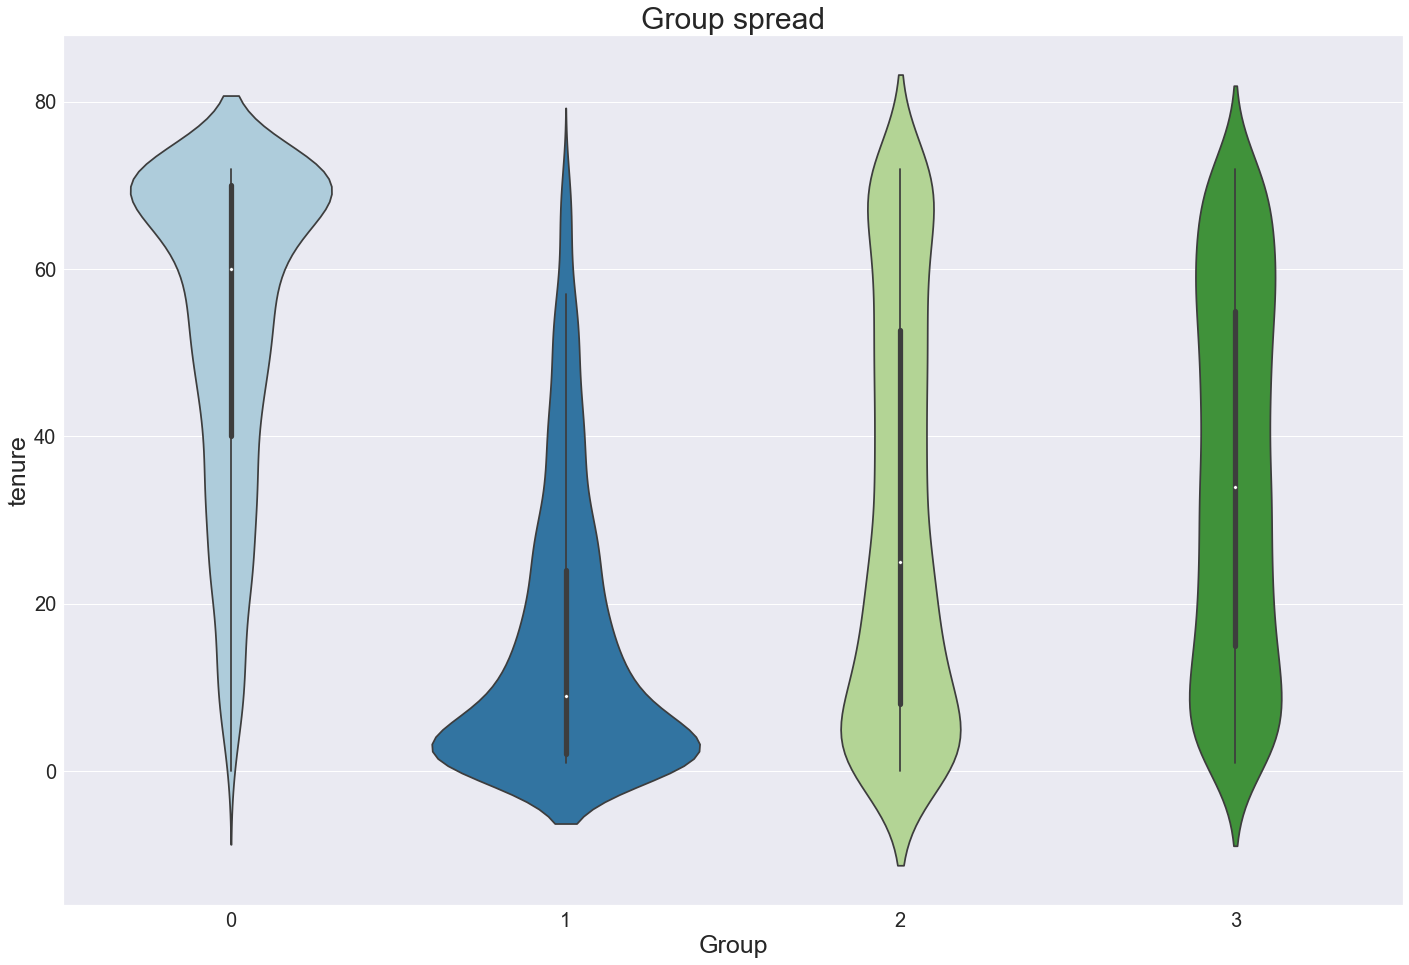

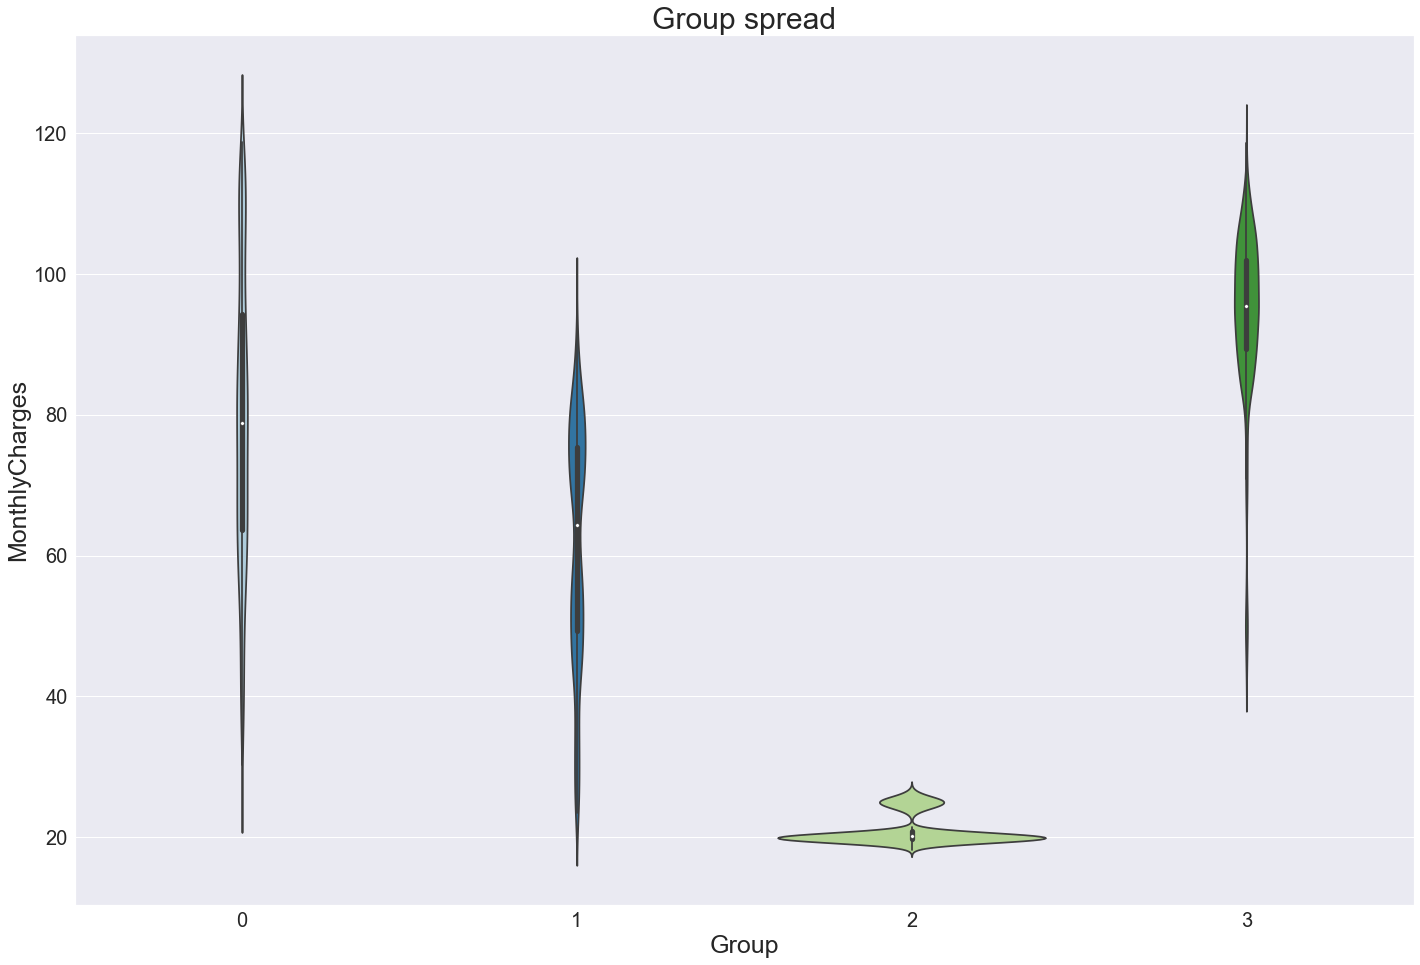

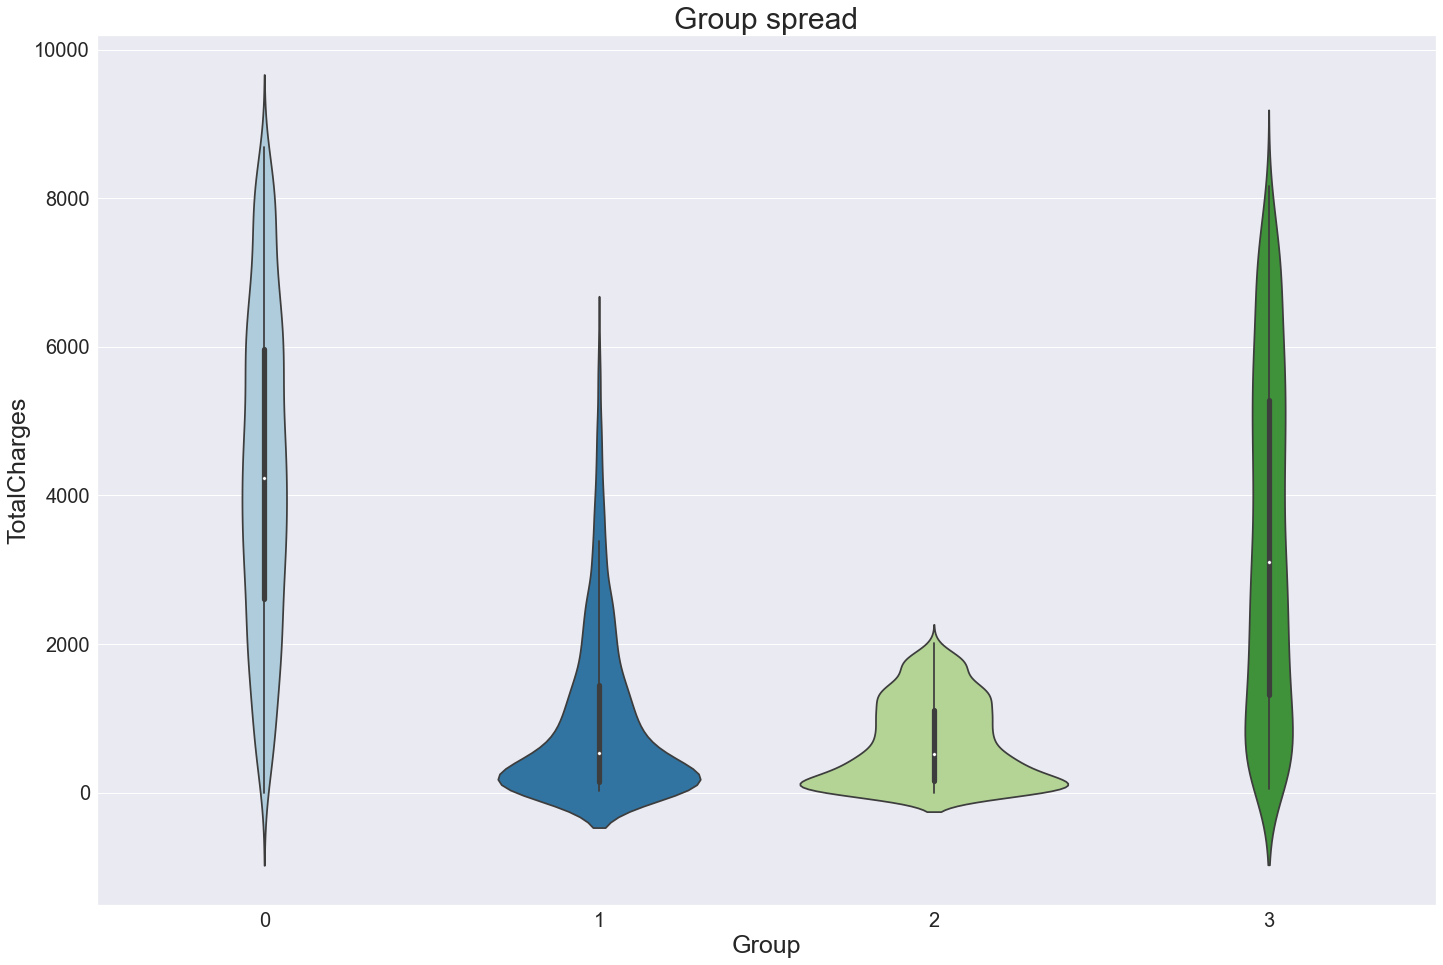

In [41]:
cont = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feat in cont:
    
    plt.figure(figsize = fig_size)
    sns.violinplot(data = df, x = 'group', y = feat)
    plt.title("Group spread", size = title_size)
    plt.xlabel("Group", size = label_size)
    plt.ylabel(feat, size = label_size)
    plt.xticks(size = tick_size)
    plt.yticks(size = tick_size)
    
    name = f"groups_violin_{feat}"
    plt.savefig(figures+name)
    plt.show()

This seems to only confirm what we already knew. Customers with a low tenure are more likely to churn. The same customers will naturally have low total charges billed. Not much can be said by looking at the monthly charge distribution for the various groups.
___

# Lets try to get some understanding for what features define the groups by looking at categorical data.

In [42]:
cat = list(df.select_dtypes("object").columns[1:]) # Skip customer ID (index 0)

In [43]:
cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [44]:
df.loc[df.Churn==1]['SeniorCitizen'].value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


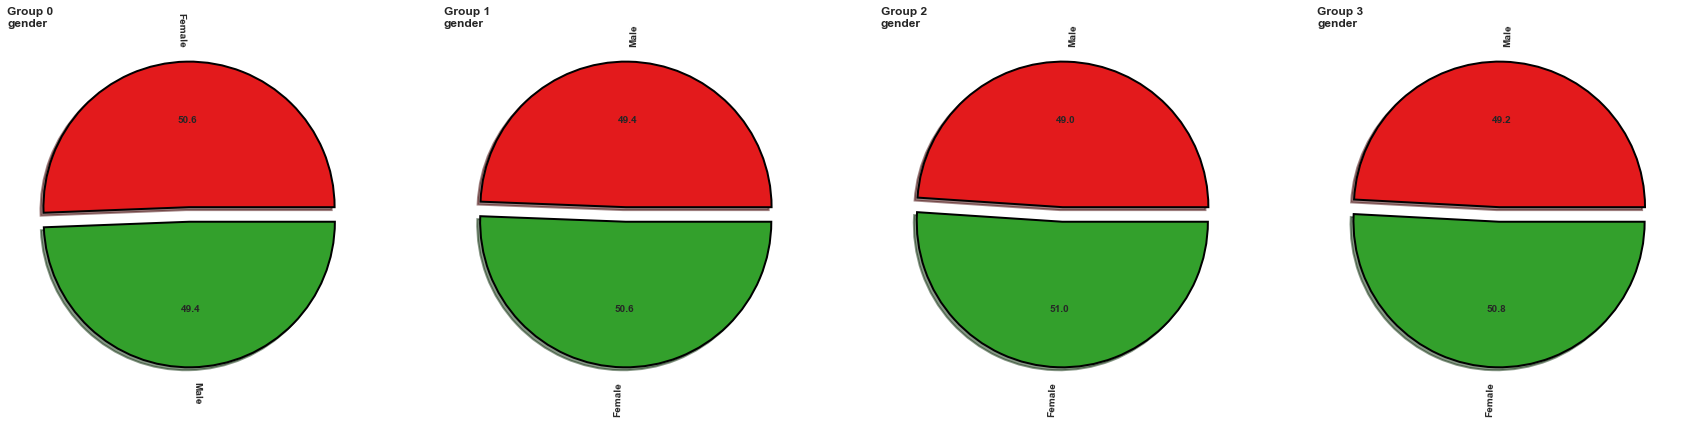

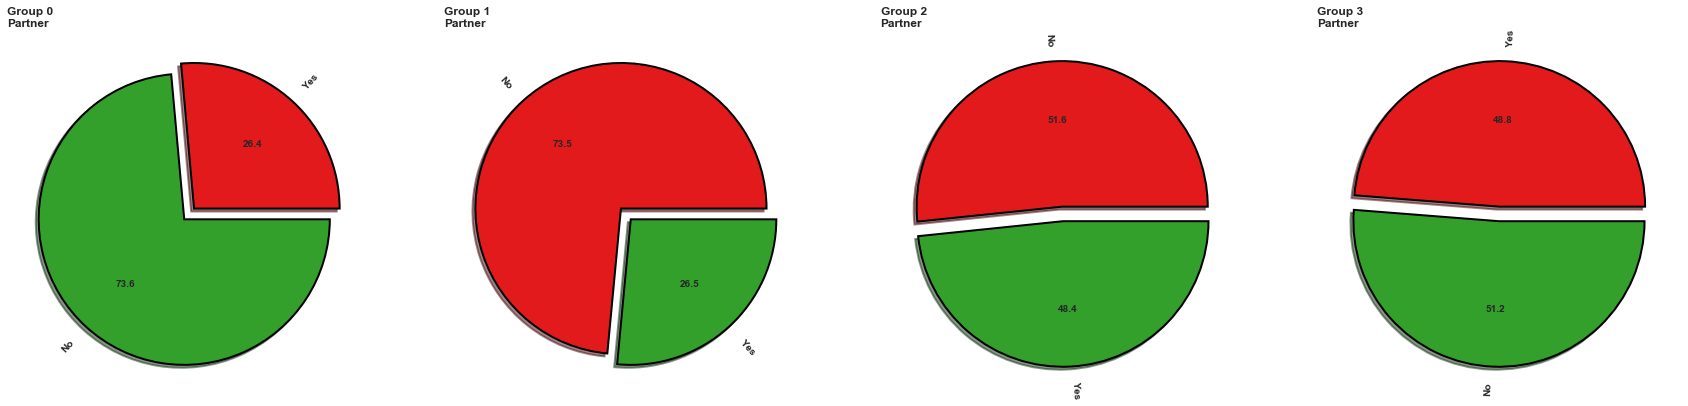

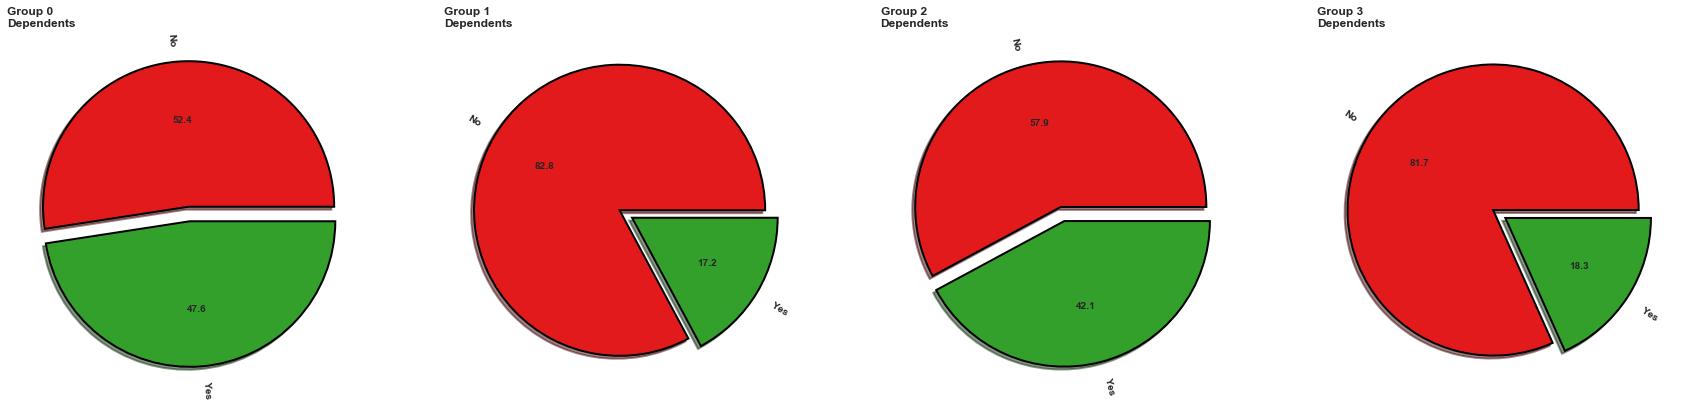

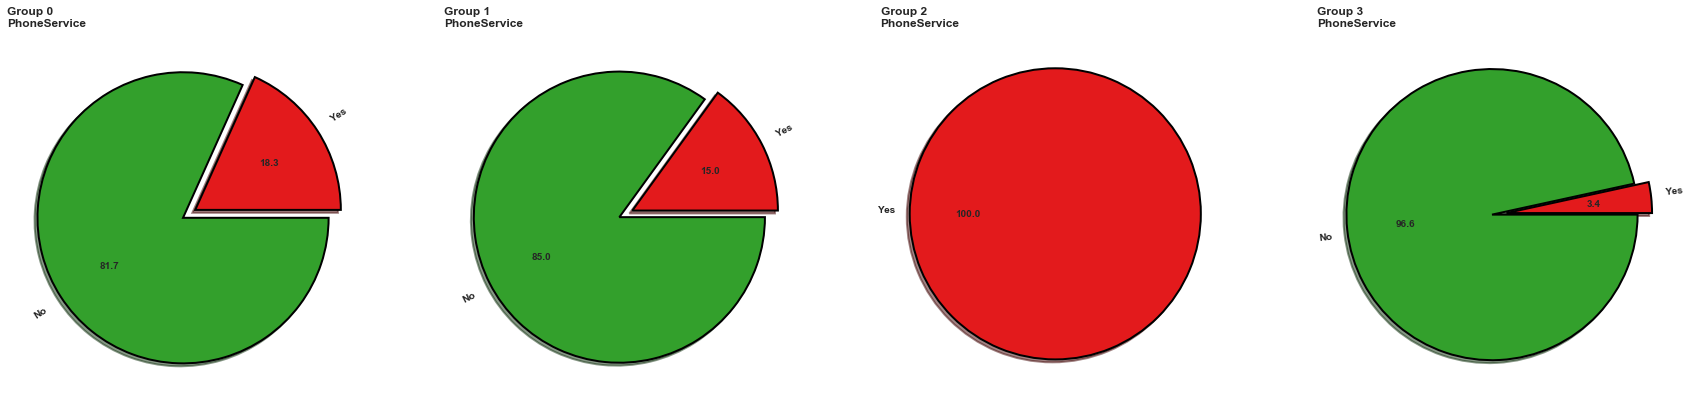

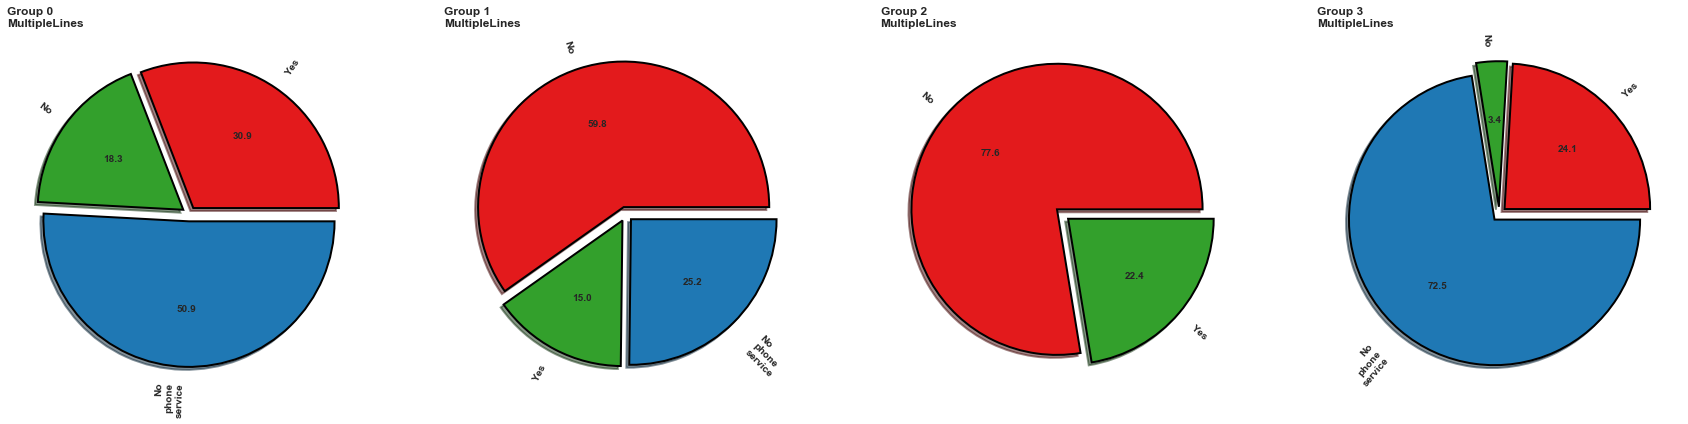

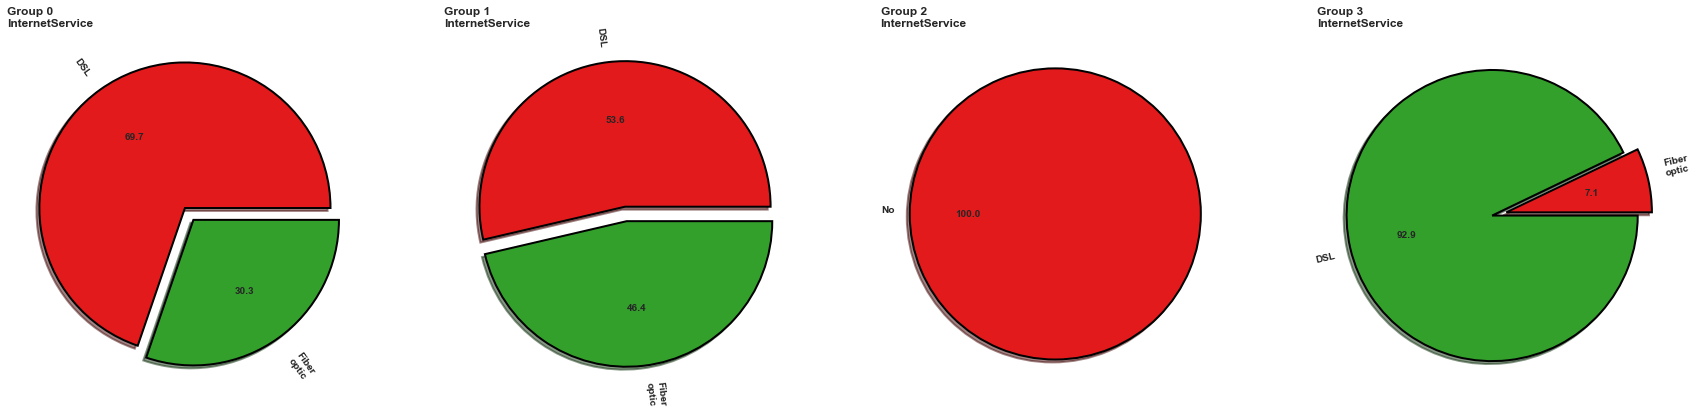

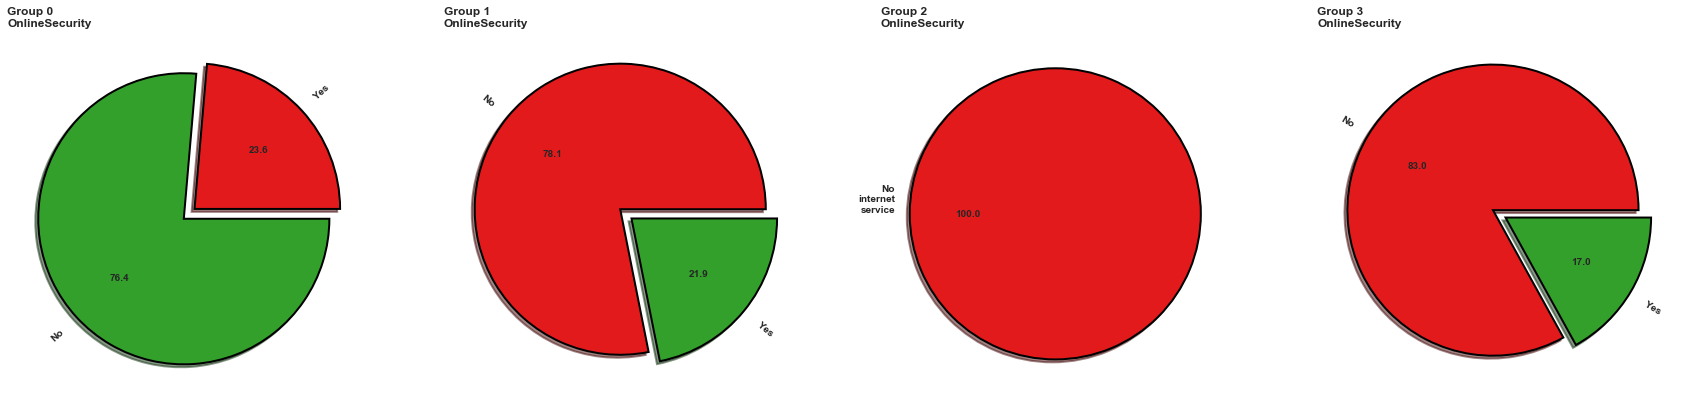

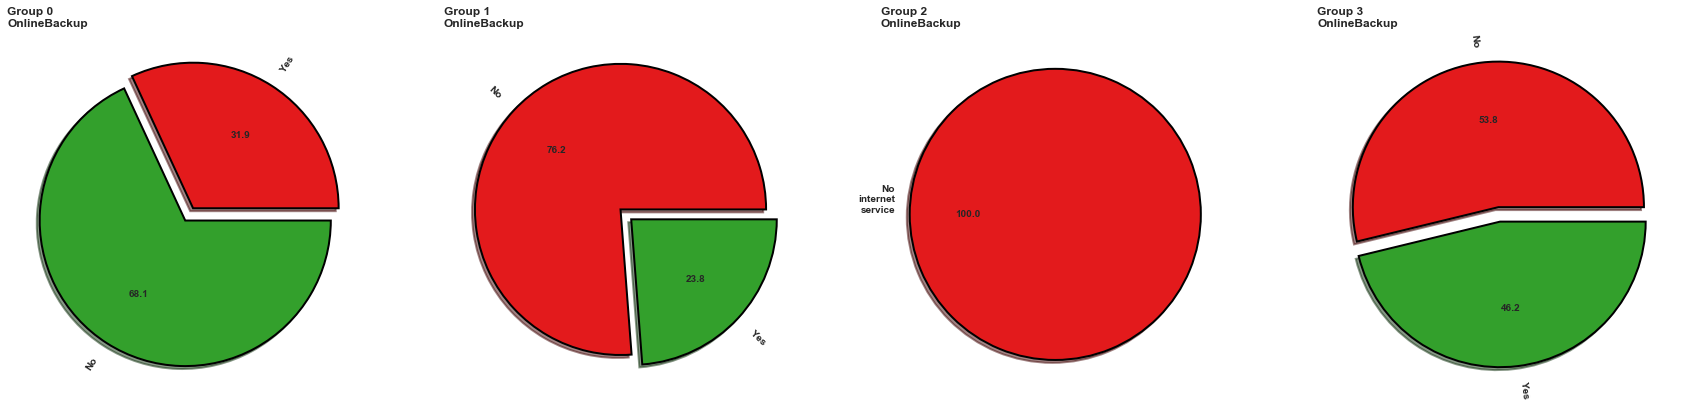

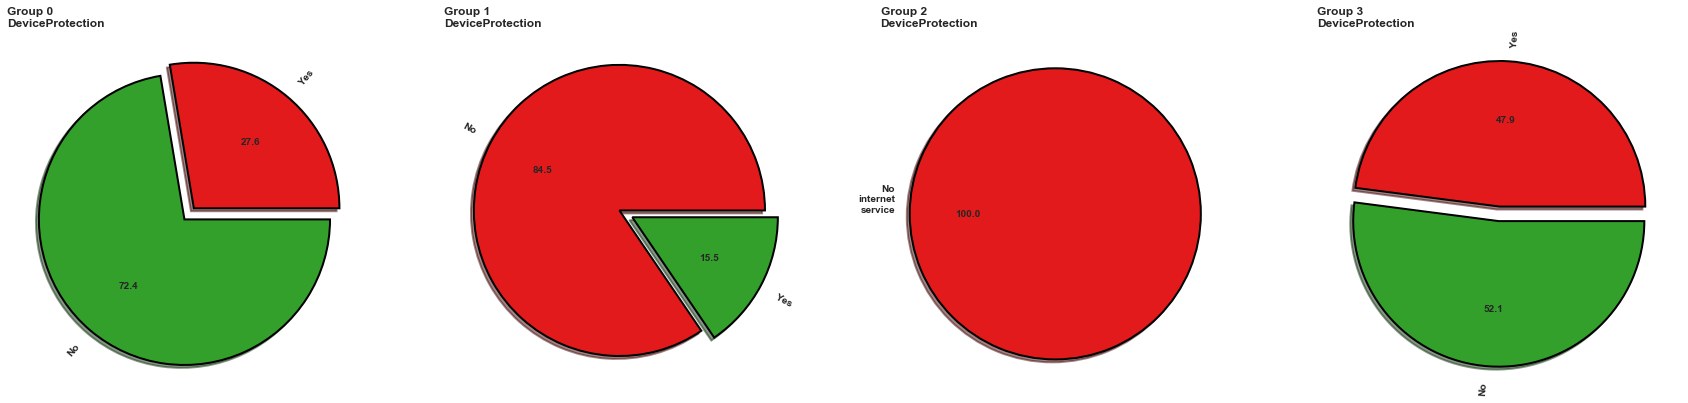

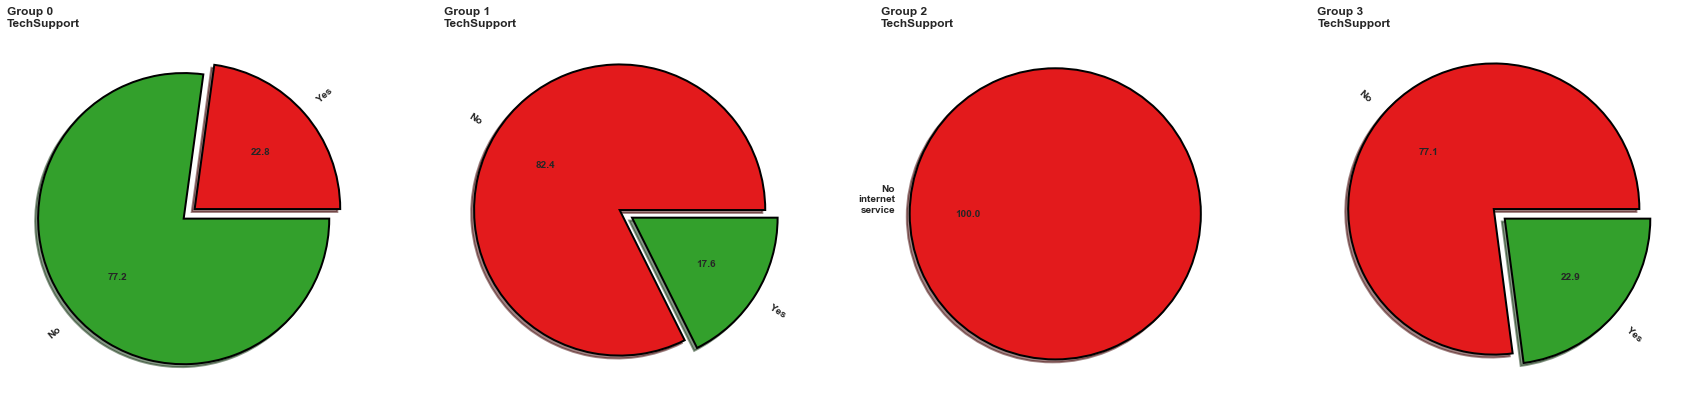

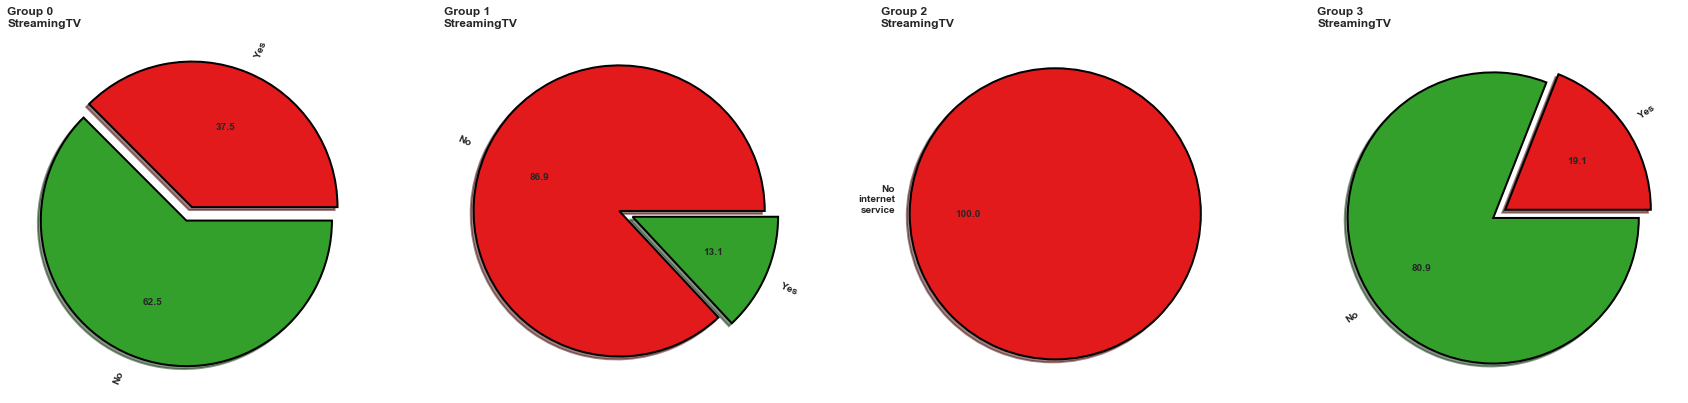

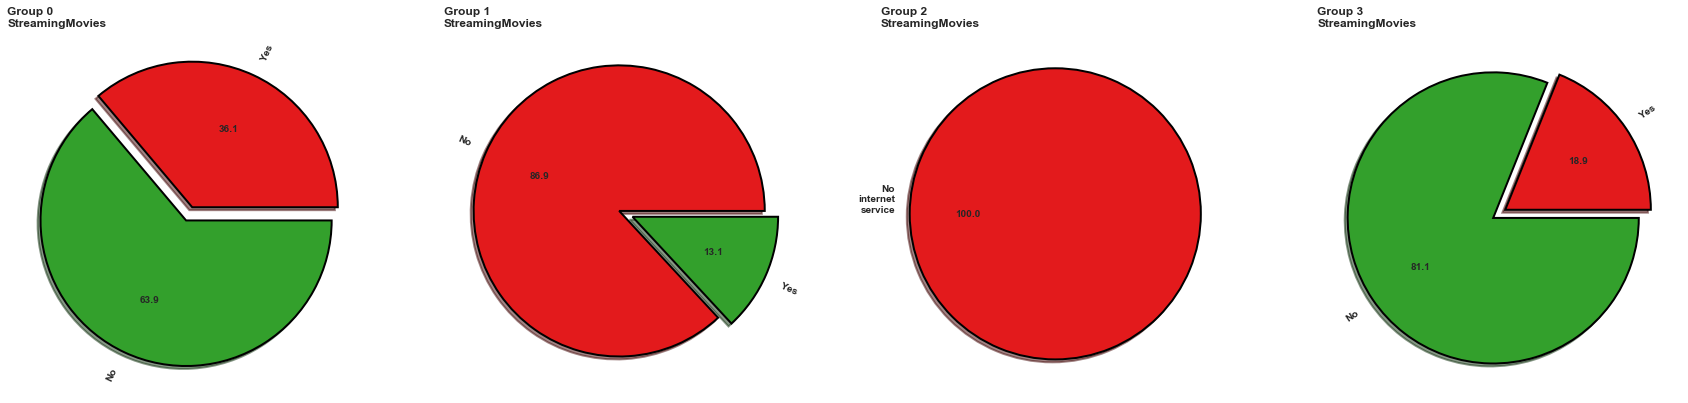

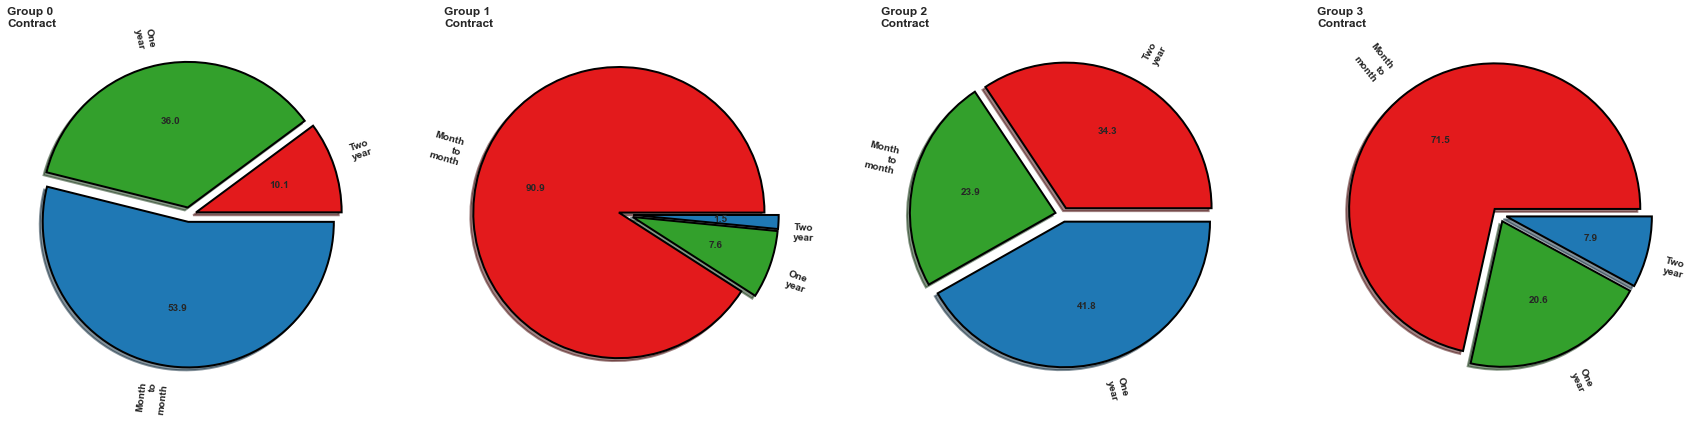

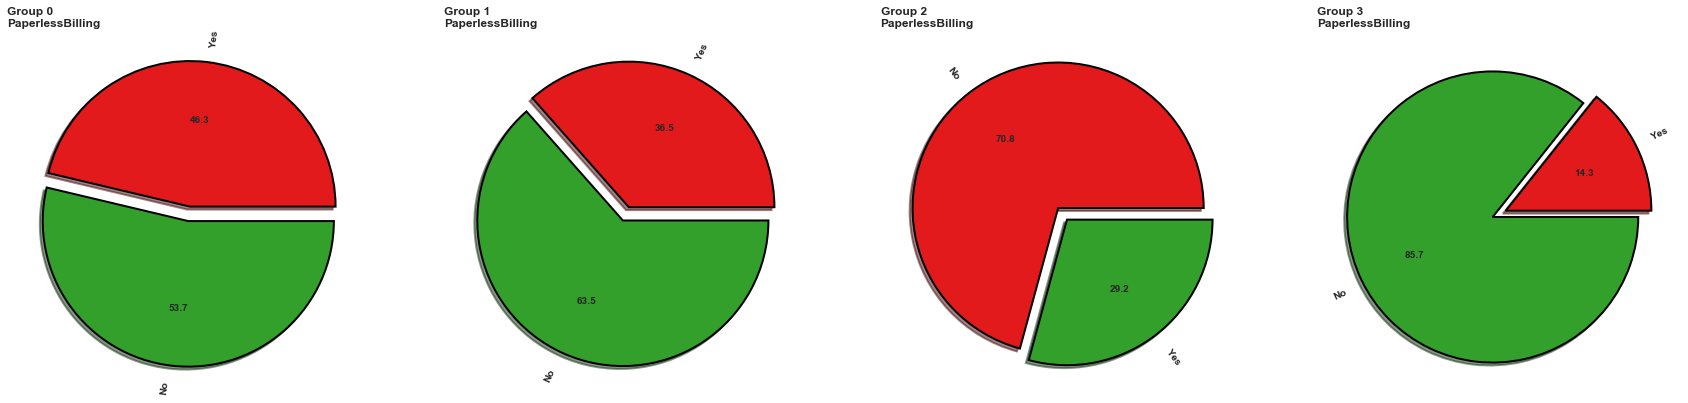

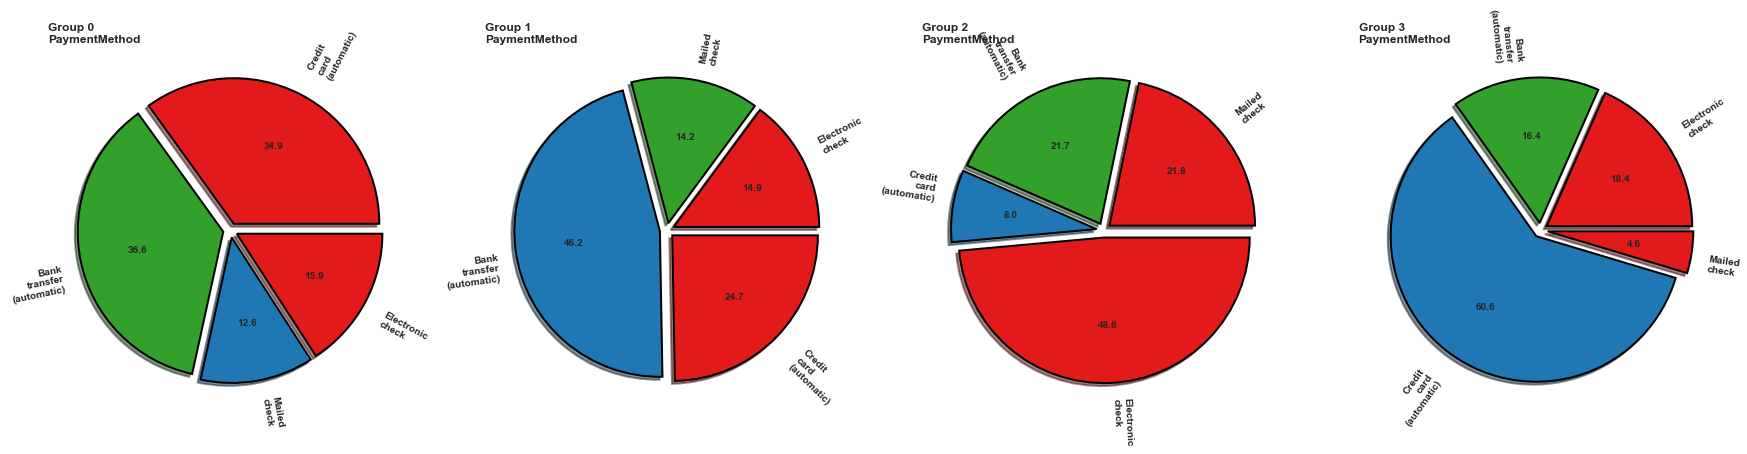

In [46]:
cat = list(df.select_dtypes("object").columns[1:]) # Skip customer ID (index 0)
colors = sns.color_palette("Paired_r")[3:]
#cat = cat + ['SeniorCitizen']
print(cat)

for c in cat:
    name = '4_group_pies_'+c
    fig = plt.figure(figsize=(30,15))
    for i in range(0,4):

        x0 = df.loc[df.group == i][c].value_counts()
        x0.sort_index(inplace=True)
        labels = list(df.loc[df.group == i][c].value_counts().index)
        
        for j in range(0,len(labels)):
            labels[j] = labels[j].replace(" ","\n").replace("-","\n")
            
        ax1 = plt.subplot2grid((1,4),(0,i))

        ax1.pie(x0,
                labels = labels,
                colors = colors[0:len(labels)],
                shadow = True,
                textprops = {"size" : 10,
                             "weight" : "bold"},
                wedgeprops = {"linewidth" : 2,
                              "edgecolor" : "black",
                              "hatch" : "",
                              "rasterized" : True},
                explode = [0.05]*(len(labels)),
                rotatelabels = True,
                autopct = "%.1f")

        plt.title(f'Group {i}\n{c}', weight = "bold", size = 12, loc = "left")
        
    plt.savefig(figures+name)

# Additional findings

If we focus on the groups that primarily churn (0 & 2), we can see that:
* **Gender**
    - There is no significant difference in gender
    
* **Partner**
    - Both groups tend to have partners
    
* **Dependents**
    - Both groups tend to not have dependents
    
* **Phone service Y/N**
    - Both groups tend to have phone service
    
* **Multiple lines Y/N**
    - There is not significant differences in whether the groups have multiple lines or not
    
* **Internet service**
    - Both groups have internet service (1 mostly fiber optic, 2 mostly DSL). Group 3 seems to be defined by not having   
    internet service.
* **Extra services**
    - Both groups tend to not have online security packages
    - Same can be said for all other add-on packages
    
* **Streaming services**
    - Group 3 has a large tendency to not have streaming TV, while group 1 is evenly split
    - Same can be said for streaming movies.
    
* **Payments**
    - Group 1 almost exclusivley uses contracts on a month to month basis
    - Group 2 uses mostly M2M contracts but has 18% as one year.
    - Group 1 payes mostly online, while group 2 is split 50/50 between paper and electronic
    
### Ideas

* In an effort to reduce noise and get perhaps get better cluster definitions, we could reduce all extra services and streaming packages down to two features, called "streaming" and "extra service". If a customer has a single streaming service or extra service, they will be classified as a "yes", while having none will classify a "no"
___

# Lets try reducing the number of variables

In [ ]:
df_red = df.copy()
df_red.drop(columns = 'group', inplace = True)

In [ ]:
streaming = ["StreamingTV", "StreamingMovies"]
service = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]

In [ ]:
streams = []
servs = []

for i in range(0,df_red.shape[0]):
    
    if "Yes" in list(df_red.iloc[i][streaming]):
        streams.append("Yes")
    else:
        streams.append("No")
        
    if "Yes" in list(df_red.iloc[i][service]):
        servs.append("Yes")
    else:
        servs.append("No")

In [ ]:
streams = pd.Series(streams)
servs = pd.Series(servs)

In [ ]:
df_red["Streaming"] = streams
df_red["Services"] = servs

In [ ]:
df_red.drop(columns = streaming + service, inplace = True)

### Repeat clustering

In [ ]:
X = df_red.drop(columns = "customerID")

scaler = RobustScaler(with_centering = False)
encoder = OneHotEncoder()
cluster = KMeans(random_state = 42)

pipe = make_pipeline(encoder, scaler, KElbowVisualizer(cluster))
elbow = pipe.fit(X)
elbow[2].show()
plt.savefig(figures+'elbow_score_reduced')
plt.show()

We can will now use 5 clusters instead.

In [ ]:
cluster = KMeans(n_clusters = 5, random_state = 42)
pipe = make_pipeline(encoder, scaler, cluster)
pipe.fit(X)
print("Done")

In [ ]:
df_red["group"] = pipe["kmeans"].labels_
df_red.head()

### Repeat cluster analysis

In [ ]:
x1 = df_red.loc[df_red.Churn==1].groupby(by = "group")["Churn"].sum()
x2 = df_red.groupby(by = "group")["customerID"].count()
labels1 = x1.index
labels2 = x2.index

plt.pie(x = x1,
        labels = labels1,
        explode = [0.1, 0.1, 0.1, 0.1, 0.1],
        shadow = True,
        textprops = {"size" : 15,
                     "weight" : "bold"},
        wedgeprops = {"linewidth" : 2,
                      "edgecolor" : "black",
                      "hatch" : "",
                      "rasterized" : True},
        rotatelabels = True,
        startangle = 57,
        autopct = "%.1f")

plt.title("Churn distribution\namong groups", size = 15, weight = "bold", loc = "left")
plt.savefig(figures + 'groups_churn_pie')
plt.show()

plt.pie(x = x2,
        labels = labels2,
        explode = [0.05, 0.05, 0.05, 0.05, 0.05],
        shadow = True,
        textprops = {"size" : 15,
                     "weight" : "bold"},
        wedgeprops = {"linewidth" : 2,
                      "edgecolor" : "black",
                      "hatch" : "",
                      "rasterized" : True},
        rotatelabels = True,
        startangle = -20,
        autopct = "%.1f")

plt.title("Group sizes", size = 15, weight = "bold", loc = "left")
plt.savefig(figures + 'groups_size_pie')
plt.show()

### Barplots to show churn/retain for all groups

In [ ]:
plt.figure(figsize = fig_size)
sns.barplot(x = df_red.group.value_counts().index, y = df_red.group.value_counts(), alpha = 0.5)
sns.barplot(x = df_red.loc[df_red.Churn==1].group.value_counts().index, y = df_red.loc[df_red.Churn==1].group.value_counts())
plt.title("Total/Churned per group", size = title_size)
plt.xlabel("Count", size = label_size)
plt.ylabel("Group", size = label_size)
plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.savefig(figures + '5_groups_bars')
plt.show()

### Lets check churn/retain for all 5 groups

In [ ]:
for i in range(0,5):
    churn0 = df_red.loc[df_red.group==i].Churn.value_counts()
    churn0.sort_index(inplace=True)
    labels = churn0.index
    labels = ["Churn" if i == 1 else "Retain" for i in labels]

    plt.pie(x = churn0,
            labels = labels,
            explode = [0.1, 0.1],
            shadow = True,
            textprops = {"size" : 15,
                         "weight" : "bold"},
            wedgeprops = {"linewidth" : 2,
                          "edgecolor" : "black",
                          "hatch" : "",
                          "rasterized" : True},
            rotatelabels = True,
            startangle = 0,
            autopct = "%.1f")

    plt.title(f"Churn group {i}", size = 15, weight = "bold")
    plt.savefig(figures + f'5_groups_churn_group_{i}')
    plt.show()
    

In [ ]:
cont = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feat in cont:
    
    plt.figure(figsize = fig_size)
    sns.violinplot(data = df_red, x = 'group', y = feat)
    plt.title("Group spread", size = title_size)
    plt.xlabel("Group", size = label_size)
    plt.ylabel(feat, size = label_size)
    plt.xticks(size = tick_size)
    plt.yticks(size = tick_size)
    
    name = f"5_groups_violin_{feat}"
    plt.savefig(figures+name)
    plt.show()

In [ ]:
cat = list(df_red.select_dtypes("object").columns[1:]) # Skip customer ID (index 0)
colors = sns.color_palette("Paired_r")[3:]

for c in cat:
    name = '5_group_pies_' + c
    fig = plt.figure(figsize=(30,15))
    for i in range(0,5):

        x0 = df_red.loc[df_red.group == i][c].value_counts()
        labels = list(df_red.loc[df_red.group == i][c].value_counts().index)
        
        for j in range(0,len(labels)):
            labels[j] = labels[j].replace(" ","\n").replace("-","\n")
            
        ax1 = plt.subplot2grid((1,5),(0,i))

        ax1.pie(x0,
                labels = labels,
                colors = colors[0:len(labels)],
                shadow = True,
                textprops = {"size" : 10,
                             "weight" : "bold"},
                wedgeprops = {"linewidth" : 2,
                              "edgecolor" : "black",
                              "hatch" : "",
                              "rasterized" : True},
                explode = [0.05]*len(labels),
                rotatelabels = True,
                autopct = "%.1f")

        plt.title(f'Group {i}\n{c}', weight = "bold", size = 12, loc = "left")
        
    plt.savefig(figures+name)

# Conclusions

Reducing the number of features resulted in more groups which makes things more complicated. We will instead move forward with what we have learned from the 4-cluster study. We will keep these groups as we move forward with supervised ML classification

In [47]:
df.to_csv(data+'WA_Fn-UseC_-Telco-Customer-Churn_CLUSTERS.csv')

In [ ]:
import itertools

cols = list(df.columns)
combinations = {}

for i in range(1, len(cols)+1):
    combinations[i] = list(itertools.combinations(cols, r = i))
    
count = 0

for i in combinations.keys():
    count += len(combinations[i])
print("There are a total of", count, "combinations!")

In [ ]:
twos = combinations[2]

In [ ]:
len(twos)

In [ ]:
test = set(twos)

In [ ]:
twos